In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv(r"C:\Users\Hp\Desktop\Reviews.csv\Reviews.csv", encoding= 'utf-8')

In [3]:
db.shape

(568454, 10)

In [4]:
db = db.head(500)
db

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [5]:
db["Score"].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

In [6]:
##Basic NLTK

In [7]:
instance = db["Text"][50]
print(instance)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [8]:
import nltk

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
token=nltk.word_tokenize(instance)
token[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
tagged=nltk.pos_tag(token)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [12]:
##VADER

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
sia= SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores(' it is the worst ever')

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [16]:
res={}

for i, row in tqdm(db.iterrows(), total=len(db)):
    text= row['Text']
    myid= row['Id']
    res[myid]= sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(db, how='left')

In [18]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


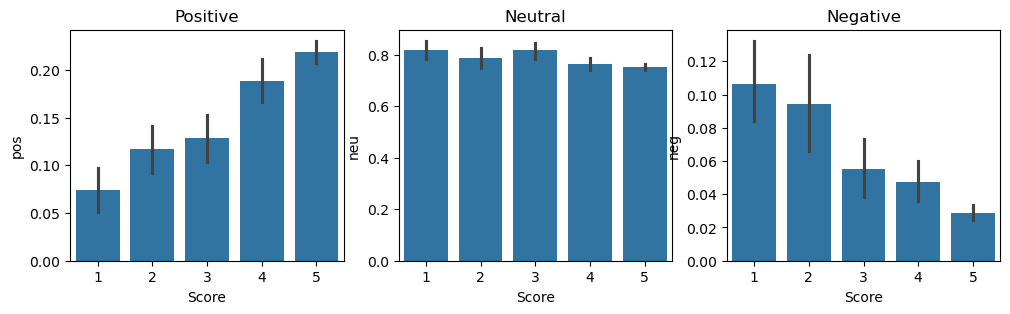

In [19]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:  34%|###3      | 252M/750M [00:00<?, ?B/s]

C:\Users\Hp\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hp\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTT

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [29]:
encode= tokenizer(instance, return_tensors='pt')
output= model(**encode)
scores=output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict={
    'robeta_neg':scores[0],
    'robeta_neu':scores[1],
    'robeta_pos':scores[2]
}
print(scores_dict)

{'robeta_neg': 0.97635514, 'robeta_neu': 0.020687457, 'robeta_pos': 0.0029573694}


In [33]:
def polarity_scores_roberta(instance):
    encode= tokenizer(instance, return_tensors='pt')
    output= model(**encode)
    scores=output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [40]:
res={}

for i, row in tqdm(db.iterrows(), total=len(db)):
    try:
        text= row['Text']
        myid= row['Id']
        vader= sia.polarity_scores(text)
        vader_rename={}
        for key, value in vader.items():
            vader_rename[f'vader_{key}']= value
        roberta = polarity_scores_roberta(text)
        both={**vader, **roberta}
        res[myid]= both
    except RuntimeError:
        print(f'broke in id {myid}')
        break

  0%|          | 0/500 [00:00<?, ?it/s]

broke in id 83


In [43]:
result=pd.DataFrame(res).T
result=result.reset_index().rename(columns={'index':'Id'})
result= result.merge(db, how='left')
result

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,0.034,0.798,0.168,0.8303,0.003559,0.027855,0.968587,B004X2KR36,A26M5O53PHZTKN,"Debs ""peanut""",0,0,5,1348185600,Taste great,These taste really good. I have been purchasin...
78,79,0.000,0.763,0.237,0.7814,0.004849,0.052556,0.942595,B004X2KR36,A2AB7M9UCNBVN7,sharonh4,0,0,3,1346976000,Order only in cold weather,"The taste was great, but the berries had melte..."
79,80,0.087,0.589,0.324,0.8636,0.626153,0.282115,0.091732,B005R8JE8O,A3H1EQD2PBC085,jmc,0,0,5,1344902400,this is the best,"i know i cannot make tea this good. granted, ..."
80,81,0.000,0.723,0.277,0.9098,0.001572,0.006270,0.992158,B0066DMI6Y,AB30HQTI5VOLR,Melinda Bishop,1,1,5,1325116800,Delicious!,This peppermint stick is delicious and fun to ...


In [44]:
result.query('Score ==1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [45]:
##pipeline

In [48]:
from transformers import pipeline

sent_pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Hp\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Hp\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling ba

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english/resolve/714eb0f/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


ValueError: Could not load model distilbert/distilbert-base-uncased-finetuned-sst-2-english with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForSequenceClassification'>, <class 'transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification'>). See the original errors:

while loading with AutoModelForSequenceClassification, an error is thrown:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\pipelines\base.py", line 291, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\models\auto\auto_factory.py", line 571, in from_pretrained
    return model_class.from_pretrained(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 279, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 4260, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 1100, in _get_resolved_checkpoint_files
    raise EnvironmentError(
OSError: distilbert/distilbert-base-uncased-finetuned-sst-2-english does not appear to have a file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt or flax_model.msgpack.

while loading with DistilBertForSequenceClassification, an error is thrown:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\pipelines\base.py", line 291, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 279, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 4260, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hp\anaconda3\Lib\site-packages\transformers\modeling_utils.py", line 1100, in _get_resolved_checkpoint_files
    raise EnvironmentError(
OSError: distilbert/distilbert-base-uncased-finetuned-sst-2-english does not appear to have a file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt or flax_model.msgpack.




In [ ]:
sent_pipe(input())